In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("archives/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.calibration import LabelEncoder

In [5]:
le=LabelEncoder()
X=df.drop('quality',axis=1)
Y=le.fit_transform(df['quality'])

x_train_full, x_test, y_train_full, y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)
x_test = scaler.fit_transform(x_test)

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(11, activation="relu"))
model.add(keras.layers.Dense(18, activation="relu"))
model.add(keras.layers.Dense(6, activation="softmax"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
sgd = SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, 
              metrics=["accuracy"])

In [9]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("model/my_keras_model.keras", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10000, 
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/10000
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3356 - loss: 1.7984 - val_accuracy: 0.4031 - val_loss: 1.7524
Epoch 2/10000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3637 - loss: 1.7728 - val_accuracy: 0.4094 - val_loss: 1.7301
Epoch 3/10000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3508 - loss: 1.7763 - val_accuracy: 0.4250 - val_loss: 1.7093
Epoch 4/10000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3645 - loss: 1.7474 - val_accuracy: 0.4250 - val_loss: 1.6899
Epoch 5/10000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3720 - loss: 1.7225 - val_accuracy: 0.4313 - val_loss: 1.6717
Epoch 6/10000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4071 - loss: 1.6690 - val_accuracy: 0.4437 - val_loss: 1.6545
Epoch 7/10000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3925 - loss: 1.6794 - val_accuracy: 0.4531 - val_loss: 1.6382
Epoch 8/10000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3953 - loss: 1.6740 - val_acc

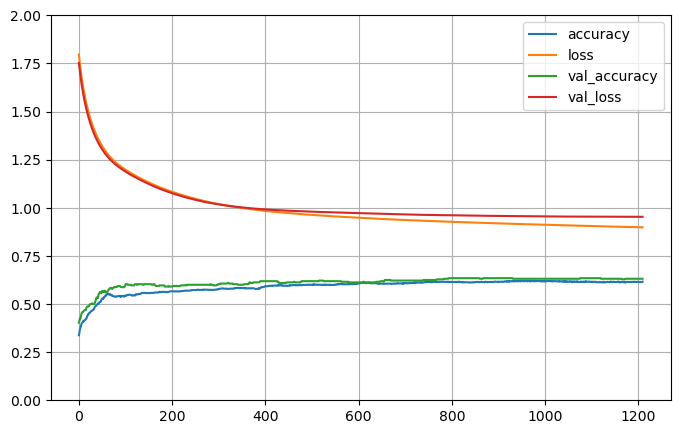

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [11]:
model.evaluate(x_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5649 - loss: 1.0044 


[0.9847189784049988, 0.5843750238418579]

In [12]:
X_nuevas = x_test[:3]
y_nuevas_pred = model.predict(X_nuevas)
y_nuevas_pred.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[0.01, 0.01, 0.06, 0.55, 0.33, 0.04],
       [0.  , 0.04, 0.47, 0.47, 0.01, 0.  ],
       [0.  , 0.04, 0.6 , 0.34, 0.02, 0.  ]], dtype=float32)

In [13]:
y_pred = np.argmax(y_nuevas_pred, axis=1)
y_pred

array([3, 3, 2], dtype=int64)

In [14]:
Y[:3]

array([2, 2, 2], dtype=int64)